In [51]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
  
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /Users/jenienam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jenienam/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [52]:
mbti_df = pd.read_csv('Resources/mbti_1.csv')
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [53]:
# clean text in 'posts' using Beautiful Soup
#def cleaning(text):
#    text = BeautifulSoup(text, "lxml").text
#    text = re.sub(r'\|\|\|', r' ', text) 
#    text = re.sub(r'http\S+', r'<URL>', text)
#    return text

In [54]:
#Apply Beautiful Soup to the mbti_df
#mbti_df['cleaned_posts'] = mbti_df['posts'].apply(cleaning)
#mbti_df
#df = mbti_df.drop(columns="posts")

In [55]:
#count the different mbti
mbti_counts = mbti_df['type'].value_counts()
mbti_counts.head()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
Name: type, dtype: int64

In [56]:
#for where a new comment begins
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

In [57]:
#define mbti and add the description to the type to the chart
mbti = {'I':'Introvert', 'E':'Extrovert', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}
#description of the type 
mbti_df['description'] = mbti_df['type'].apply(lambda x: ' '.join([mbti[l] for l in list(x)]))
#words per comment
mbti_df['words_per_comment'] = mbti_df['posts'].apply(lambda x: len(x.split())/50)
#squared totals
mbti_df['squared_total_words'] = mbti_df['words_per_comment']*2
#word count variance
mbti_df['word_count_variance_per_comment'] = mbti_df['posts'].apply(lambda x: var_row(x))
#interrobangs per comment = 
mbti_df['interrobangs_per_comment']=mbti_df['posts'].apply(lambda x: x.count('?')/50) + mbti_df['posts'].apply(lambda x: x.count('!')/50)
#preview
mbti_df.head()

,type,posts,description,words_per_comment,squared_total_words,word_count_variance_per_comment,interrobangs_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert Intuition Feeling Judging,11.12,22.24,135.2900,0.42
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert Intuition Thinking Perceiving,23.40,46.80,187.4756,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert Intuition Thinking Perceiving,16.72,33.44,180.6900,0.32
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert Intuition Thinking Judging,21.28,42.56,181.8324,0.28
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert Intuition Thinking Judging,19.34,38.68,196.4576,0.22


In [67]:
#tokenize to find pars of speeches
postss = mbti_df["posts"]
postss.head()
nltk.pos_tag(postss)
print(word_tokenize(postss[0]))
#notfinished

["'http", ':', '//www.youtube.com/watch', '?', 'v=qsXHcwe3krw|||http', ':', '//41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp', 'and', 'intj', 'moments', 'https', ':', '//www.youtube.com/watch', '?', 'v=iz7lE1g4XM4', 'sportscenter', 'not', 'top', 'ten', 'plays', 'https', ':', '//www.youtube.com/watch', '?', 'v=uCdfze1etec', 'pranks|||What', 'has', 'been', 'the', 'most', 'life-changing', 'experience', 'in', 'your', 'life', '?', '|||http', ':', '//www.youtube.com/watch', '?', 'v=vXZeYwwRDw8', 'http', ':', '//www.youtube.com/watch', '?', 'v=u8ejam5DP3E', 'On', 'repeat', 'for', 'most', 'of', 'today.|||May', 'the', 'PerC', 'Experience', 'immerse', 'you.|||The', 'last', 'thing', 'my', 'INFJ', 'friend', 'posted', 'on', 'his', 'facebook', 'before', 'committing', 'suicide', 'the', 'next', 'day', '.', 'Rest', 'in', 'peace~', 'http', ':', '//vimeo.com/22842206|||Hello', 'ENFJ7', '.', 'Sorry', 'to', 'hear', 'of', 'your', 'distress', '.', 'It', "'s", 'only', 'natural', 'for', 'a', 'r

VISUALIZATIONS

Text(0.5, 0, 'Personality Types')

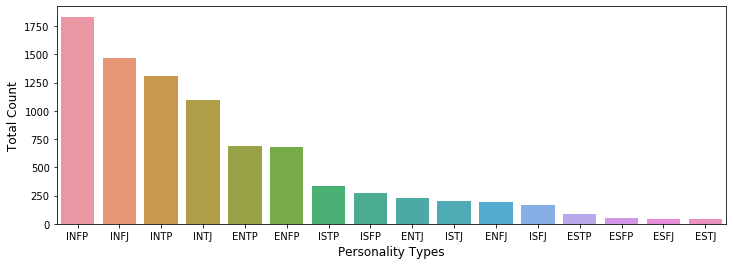

In [68]:
#see the different types of mbti and create a bar graph of counts 
plt.figure(figsize=(12,4))
count = mbti_df['type'].value_counts()
df_counts = sns.barplot(count.index, count.values, data=mbti_df)
plt.ylabel('Total Count', fontsize=12)
plt.xlabel('Personality Types', fontsize=12)

In [69]:
#comparison bar charts based on personality types 
#created new data frame with types 
split_types = mbti_df["description"].str.split(" ")
type_data = split_types.tolist()
types = ["I_vs_E", "N_vs_S", "F_vs_T", "J_vs_P"]
new_type_data = pd.DataFrame(type_data, columns=types)
new_type_data.head()

,I_vs_E,N_vs_S,F_vs_T,J_vs_P
0,Introvert,Intuition,Feeling,Judging
1,Extrovert,Intuition,Thinking,Perceiving
2,Introvert,Intuition,Thinking,Perceiving
3,Introvert,Intuition,Thinking,Judging
4,Extrovert,Intuition,Thinking,Judging


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

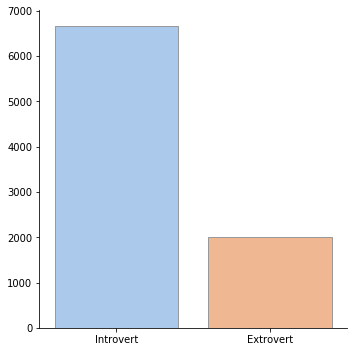

In [82]:
#bar charts for individual personality types 
sns.catplot(x=new_type_data["I_vs_E"], kind="count",
    palette="pastel", edgecolor=".6", data=new_type_data);
#sns.catplot(x=new_type_data["N_vs_S"], kind="count",
#    palette="pastel", edgecolor=".6", data= new_type_data);
#sns.catplot(x=new_type_data["F_vs_T"], kind="count",
#    palette="pastel", edgecolor=".6", data= new_type_data);
#sns.catplot(x=new_type_data["J_vs_P"], kind="count",
#    palette="pastel", edgecolor=".6", data= new_type_data);

Text(0, 0.5, 'Words per Comment')

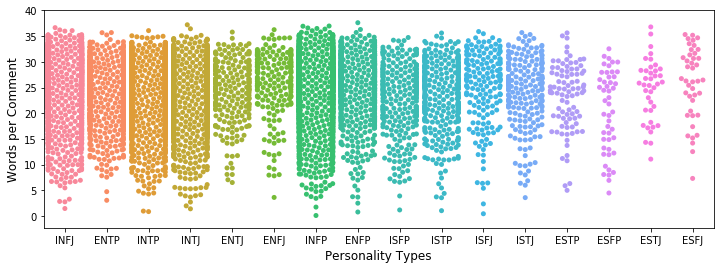

In [71]:
#words per chart
plt.figure(figsize=(12,4))
sns.swarmplot(x= mbti_df["type"], y=mbti_df["words_per_comment"]) # Set color paletteplt.ylabel('Total Count', fontsize=12)
plt.xlabel('Personality Types', fontsize=12)
plt.ylabel('Words per Comment', fontsize=12)

Text(0, 0.5, 'Interrobangs per Comment')

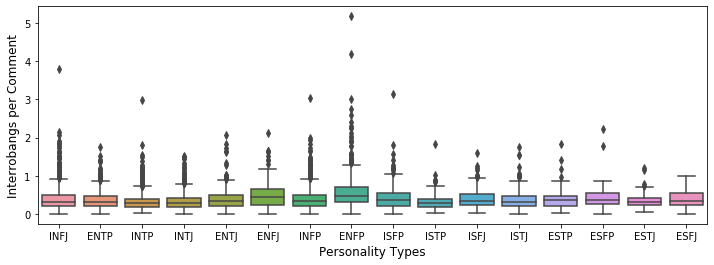

In [72]:
#interrobangs_per_comment
plt.figure(figsize=(12,4))
sns.boxplot(x= mbti_df["type"], y=mbti_df["interrobangs_per_comment"]) 
plt.xlabel('Personality Types', fontsize=12)
plt.ylabel('Interrobangs per Comment', fontsize=12)